# **FINAL PROJECT PCM - 2 (DISH)**

**Oleh Nurul Annisa (5023221031)**

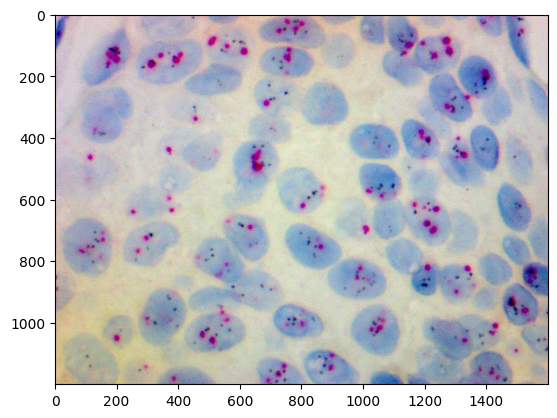

(dtype('uint8'), (1200, 1600, 3))

In [1]:
import imageio.v2 as imageio
from matplotlib import pyplot as plt
import numpy as np

# im = imageio.imread('DISH1.jpg')
# im = imageio.imread('DISH2.jpg')
im = imageio.imread('DISH3.jpg') #tolok awal
# im = imageio.imread('DISH4.jpg')
# im = imageio.imread('DISH5.jpg')
plt.imshow(im, cmap='gray')
plt.show()
im.dtype, im.shape

Text(0.5, 1.0, 'Histogram of raw FISH image')

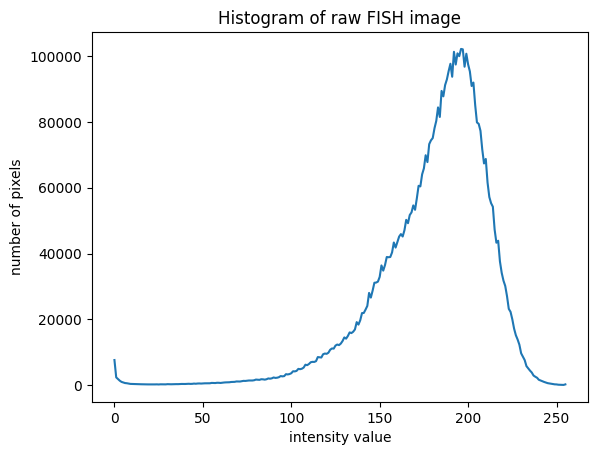

In [2]:
from skimage import exposure
import scipy.ndimage as ndi

histogram = ndi.histogram(im, min=0, max=255, bins=256)
plt.plot(histogram)
plt.xlabel('intensity value')
plt.ylabel('number of pixels')
plt.title('Histogram of raw FISH image')

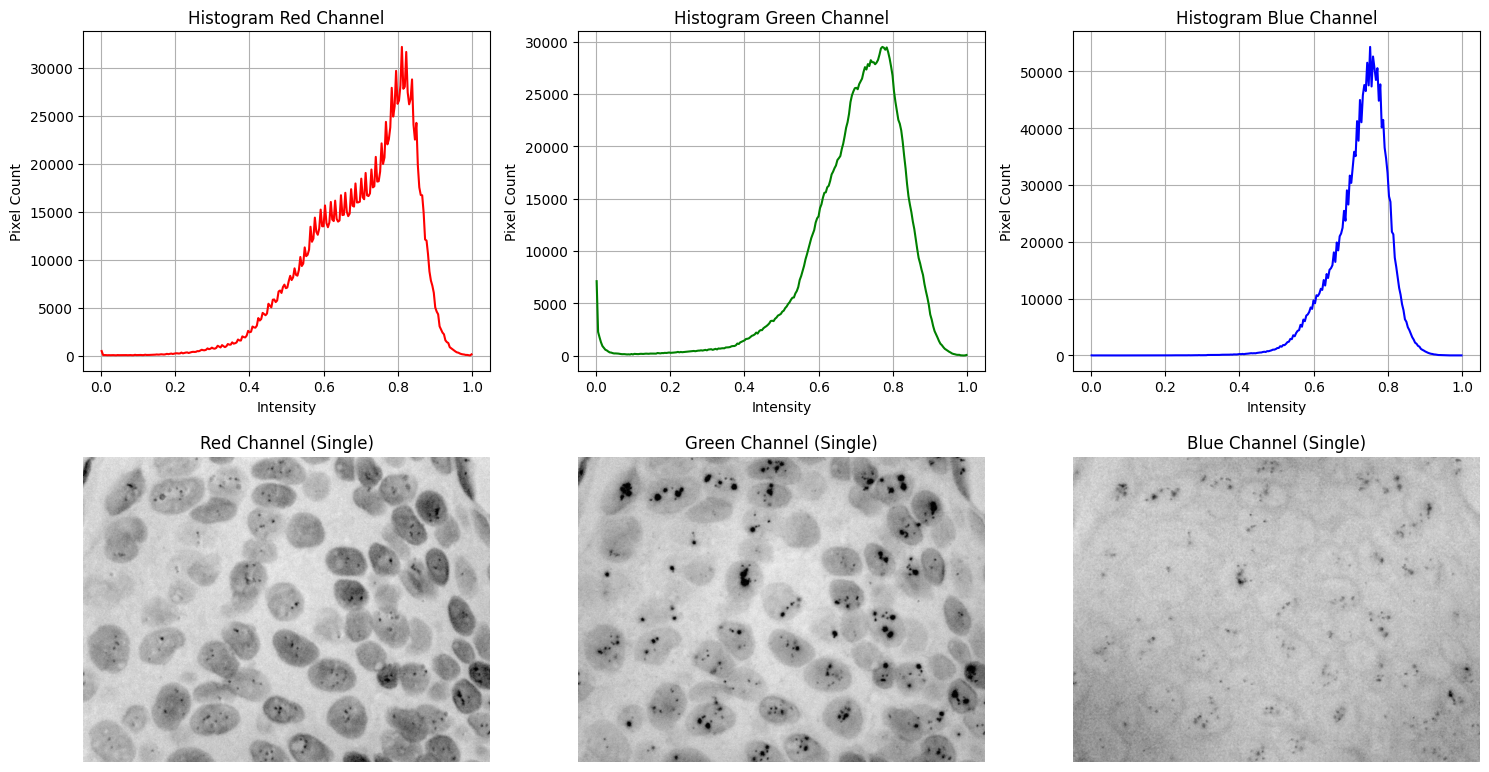

In [3]:
# Import pustaka
import matplotlib.pyplot as plt
from skimage import io, exposure
import numpy as np

# Normalisasi jika perlu
if im.dtype != np.float32 and im.dtype != np.float64:
    image = im / 255.0
else:
    image = im

# Pisahkan channel
r = image[:, :, 0]
g = image[:, :, 1]
b = image[:, :, 2]

# Hitung histogram
hist_r, bins_r = exposure.histogram(r)
hist_g, bins_g = exposure.histogram(g)
hist_b, bins_b = exposure.histogram(b)

# Buat figure besar untuk histogram + gambar
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# ---------------------
# Baris 1: Histogram
# ---------------------
axs[0, 0].plot(bins_r, hist_r, color='red')
axs[0, 0].set_title('Histogram Red Channel')
axs[0, 0].set_xlabel('Intensity')
axs[0, 0].set_ylabel('Pixel Count')
axs[0, 0].grid(True)

axs[0, 1].plot(bins_g, hist_g, color='green')
axs[0, 1].set_title('Histogram Green Channel')
axs[0, 1].set_xlabel('Intensity')
axs[0, 1].set_ylabel('Pixel Count')
axs[0, 1].grid(True)

axs[0, 2].plot(bins_b, hist_b, color='blue')
axs[0, 2].set_title('Histogram Blue Channel')
axs[0, 2].set_xlabel('Intensity')
axs[0, 2].set_ylabel('Pixel Count')
axs[0, 2].grid(True)

# ---------------------
# Baris 2: Gambar Per Channel (Grayscale dari masing-masing channel)
# ---------------------
axs[1, 0].imshow(r, cmap='gray')
axs[1, 0].set_title('Red Channel (Single)')
axs[1, 0].axis('off')

axs[1, 1].imshow(g, cmap='gray')
axs[1, 1].set_title('Green Channel (Single)')
axs[1, 1].axis('off')

axs[1, 2].imshow(b, cmap='gray')
axs[1, 2].set_title('Blue Channel (Single)')
axs[1, 2].axis('off')

# Tata letak agar rapi
plt.tight_layout()
plt.show()


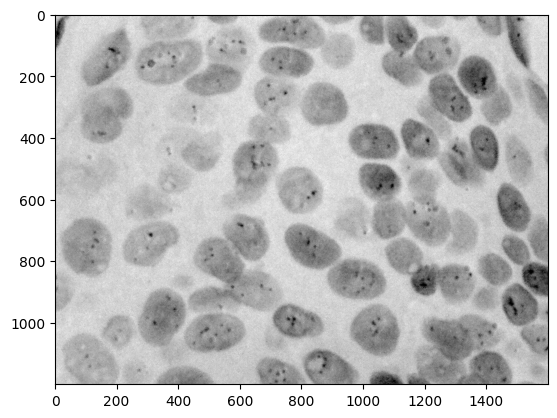

(dtype('float64'), (1200, 1600))

In [4]:
from matplotlib import pyplot as plt
import numpy as np

plt.imshow(r, cmap='gray')
plt.show()
r.dtype, r.shape

preprocessing with CLAHE

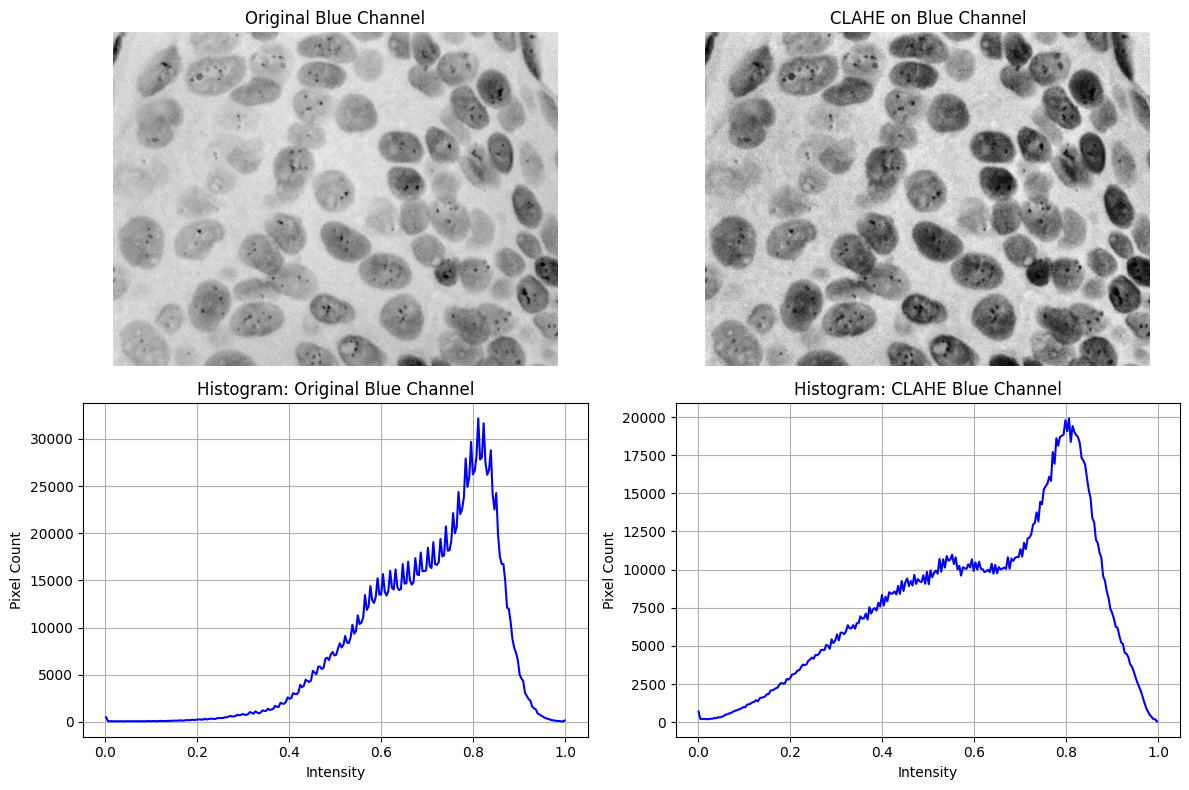

In [5]:
# CLAHE pada channel red
r_clahe = exposure.equalize_adapthist(r, clip_limit=0.007)  # Bisa atur clip_limit

# Hitung histogram original dan CLAHE
hist_r, bins_r = exposure.histogram(r)
hist_clahe, bins_clahe = exposure.histogram(r_clahe)

# Plot citra dan histogram
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Gambar Blue Channel
axs[0, 0].imshow(r, cmap='gray')
axs[0, 0].set_title('Original Blue Channel')
axs[0, 0].axis('off')

# Gambar Blue Channel setelah CLAHE
axs[0, 1].imshow(r_clahe, cmap='gray')
axs[0, 1].set_title('CLAHE on Blue Channel')
axs[0, 1].axis('off')

# Histogram Original
axs[1, 0].plot(bins_r, hist_r, color='blue')
axs[1, 0].set_title('Histogram: Original Blue Channel')
axs[1, 0].set_xlabel('Intensity')
axs[1, 0].set_ylabel('Pixel Count')
axs[1, 0].grid(True)

# Histogram CLAHE
axs[1, 1].plot(bins_clahe, hist_clahe, color='blue')
axs[1, 1].set_title('Histogram: CLAHE Blue Channel')
axs[1, 1].set_xlabel('Intensity')
axs[1, 1].set_ylabel('Pixel Count')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

**Otsu thresholding**

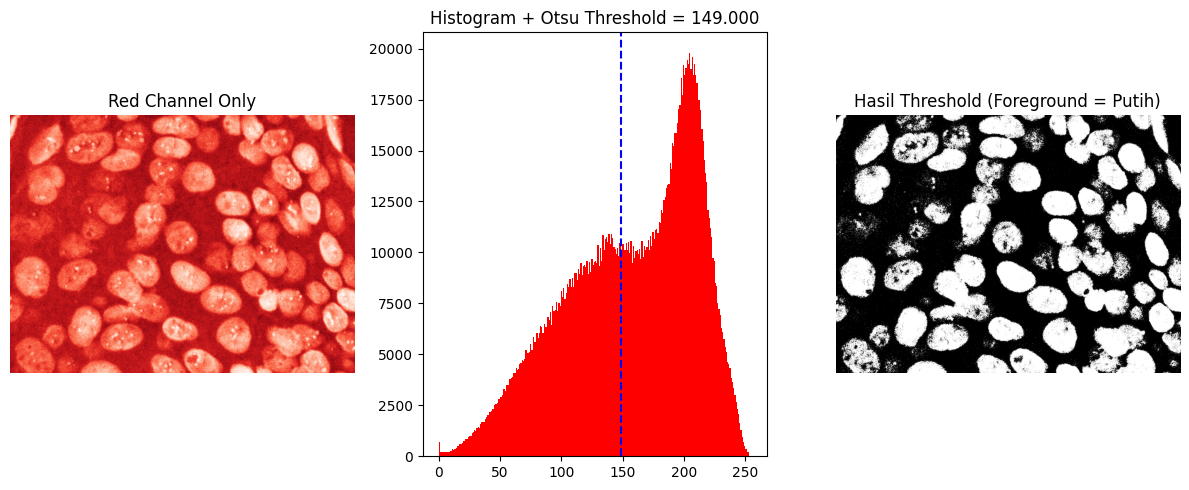

In [11]:
from skimage import io, filters
import matplotlib.pyplot as plt
import numpy as np

#konversi ke uint8 
r_uint = (r_clahe*255).astype(np.uint8)

# Thresholding dengan Otsu langsung di channel biru
thresh_val = filters.threshold_otsu(r_uint)
binary_mask = r_uint < thresh_val  # foreground = True

# Tampilkan hasil
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(r_uint, cmap='Reds')
plt.title('Red Channel Only')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.hist(r_uint.ravel(), bins=256, color='red')
plt.axvline(thresh_val, color='blue', linestyle='--')
plt.title(f'Histogram + Otsu Threshold = {thresh_val:.3f}')

plt.subplot(1, 3, 3)
plt.imshow(binary_mask, cmap='gray')
plt.title('Hasil Threshold (Foreground = Putih)')
plt.axis('off')

plt.tight_layout()
plt.show()

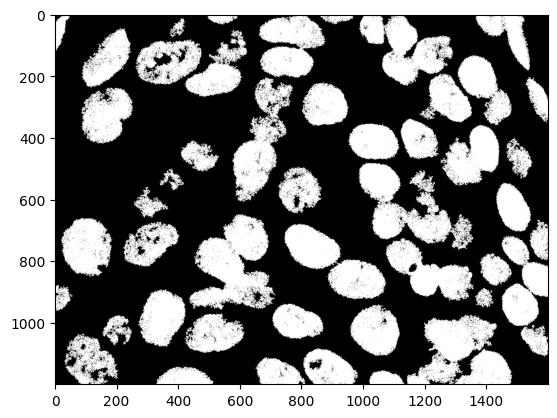

In [12]:
from skimage import morphology

#Remove small objects
only_large_blobs = morphology.remove_small_objects(binary_mask, 
                                                   min_size=1200)
plt.imshow(only_large_blobs, cmap='gray')


bool


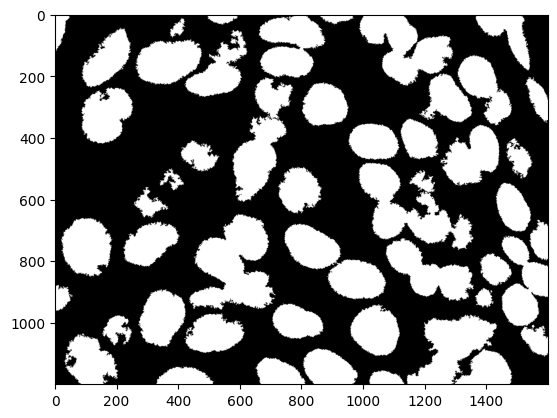

In [17]:
#filling pada foreground untuk menghilangkan objek hitam pada foreground
#Fill small holes
only_large = np.logical_not(morphology.remove_small_objects(
                                    np.logical_not(only_large_blobs), 
                                                   min_size=2500))
image_segmented = only_large
plt.imshow(image_segmented, cmap='gray')
print(image_segmented.dtype)

In [18]:
labels, nlabels = ndi.label(image_segmented)

label_arrays = []

print('There are {} separate components / objects detected.'.format(nlabels))


There are 50 separate components / objects detected.


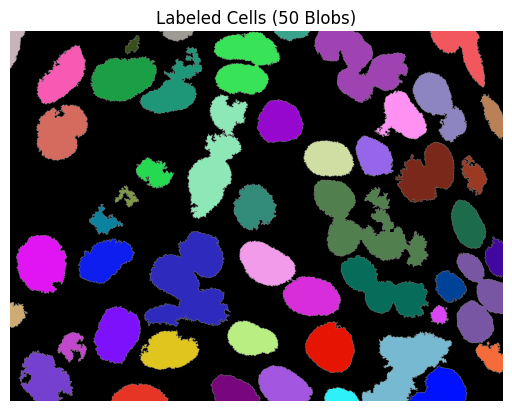

In [19]:
# Create a random colormap
from matplotlib.colors import ListedColormap
rand_cmap = ListedColormap(np.random.rand(256,3))

labels_for_display = np.where(labels > 0, labels, np.nan)
plt.imshow(image_segmented, cmap='gray')
plt.imshow(labels_for_display, cmap=rand_cmap)
plt.axis('off')
plt.title('Labeled Cells ({} Blobs)'.format(nlabels))
plt.show()


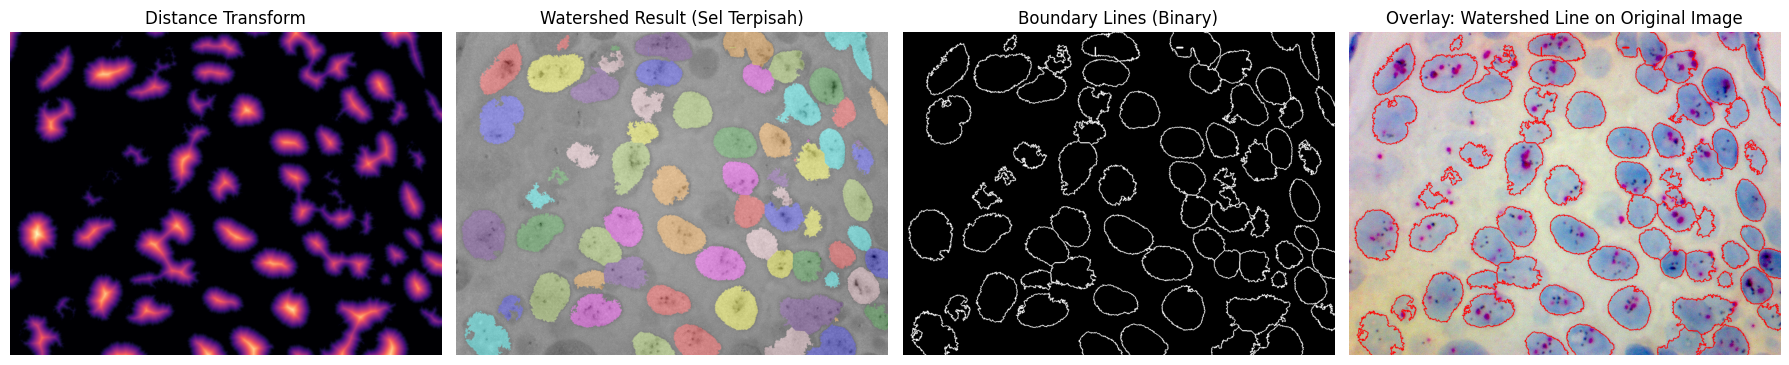

In [26]:
import numpy as np
from skimage import morphology, segmentation, feature, measure, color
from skimage.filters import gaussian
from scipy import ndimage as ndi
from skimage.segmentation import find_boundaries
from skimage.morphology import binary_dilation, disk
import matplotlib.pyplot as plt

def watershed_segmentation(image_segmented, image, sigma=1.5, min_distance=10, footprint_size=15, show_plot=True):
    
    # Step 1: Distance transform & Gaussian smoothing
    distance = ndi.distance_transform_edt(image_segmented)
    distance_smooth = gaussian(distance, sigma=sigma)

    # Step 2: Cari koordinat seed (local maxima)
    coordinates = feature.peak_local_max(
        distance_smooth,
        labels=image_segmented,
        min_distance=min_distance,
        footprint=np.ones((footprint_size, footprint_size))
    )

    # Step 3: Buat mask seed
    local_maxi = np.zeros_like(distance, dtype=bool)
    local_maxi[tuple(coordinates.T)] = True

    # Step 4: Label markers
    markers = measure.label(local_maxi)

    # Step 5: Watershed segmentation
    labels_ws = segmentation.watershed(-distance, markers, mask=image_segmented)

    # Step 6: Buat boundary dan overlay
    boundaries = find_boundaries(labels_ws, mode='inner')
    thick_boundaries = binary_dilation(boundaries, disk(1))

    image_with_lines = image.copy()
    # Pastikan format RGB-nya benar untuk ditampilkan
    if image_with_lines.dtype != np.uint8:
        image_with_lines = (image_with_lines * 255).clip(0, 255).astype(np.uint8)
    image_with_lines[thick_boundaries] = [255, 0, 0]  # merah

    # Visualisasi jika diminta
    if show_plot:
        fig, axs = plt.subplots(1, 4, figsize=(18, 6))
        
        axs[0].imshow(distance, cmap='magma')
        axs[0].set_title('Distance Transform')
        axs[0].axis('off')

        axs[1].imshow(color.label2rgb(labels_ws, image=image, bg_label=0))
        axs[1].set_title("Watershed Result (Sel Terpisah)")
        axs[1].axis('off')

        axs[2].imshow(thick_boundaries, cmap='gray')
        axs[2].set_title("Boundary Lines (Binary)")
        axs[2].axis('off')

        axs[3].imshow(image_with_lines)
        axs[3].set_title("Overlay: Watershed Line on Original Image")
        axs[3].axis('off')

        plt.tight_layout()
        plt.show()

    return labels_ws, thick_boundaries, image_with_lines

labels_ws, lines_mask, overlay_img = watershed_segmentation(
    image_segmented=image_segmented,  # binary mask hasil segmentasi awal
    image=im,            # citra asli
    sigma=1.5,
    min_distance=60,
    footprint_size=21,
    show_plot=True
)


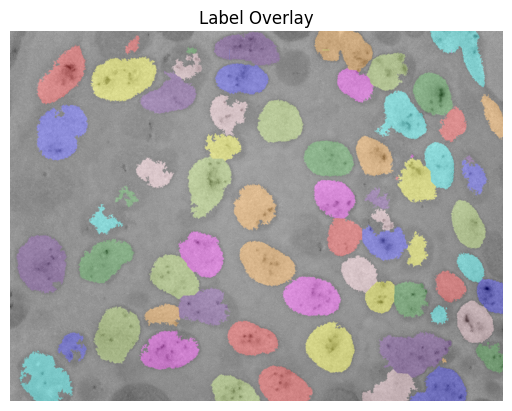

In [27]:
im_label = color.label2rgb(labels_ws, image=image, bg_label=0)
plt.imshow(im_label)
plt.title("Label Overlay")
plt.axis('off')
plt.show()


In [28]:
print("Jumlah objek (label):", labels_ws.max())


Jumlah objek (label): 72


**EVALUASI SEGMENTASI SEL DENGAN GROUND TRUTH**

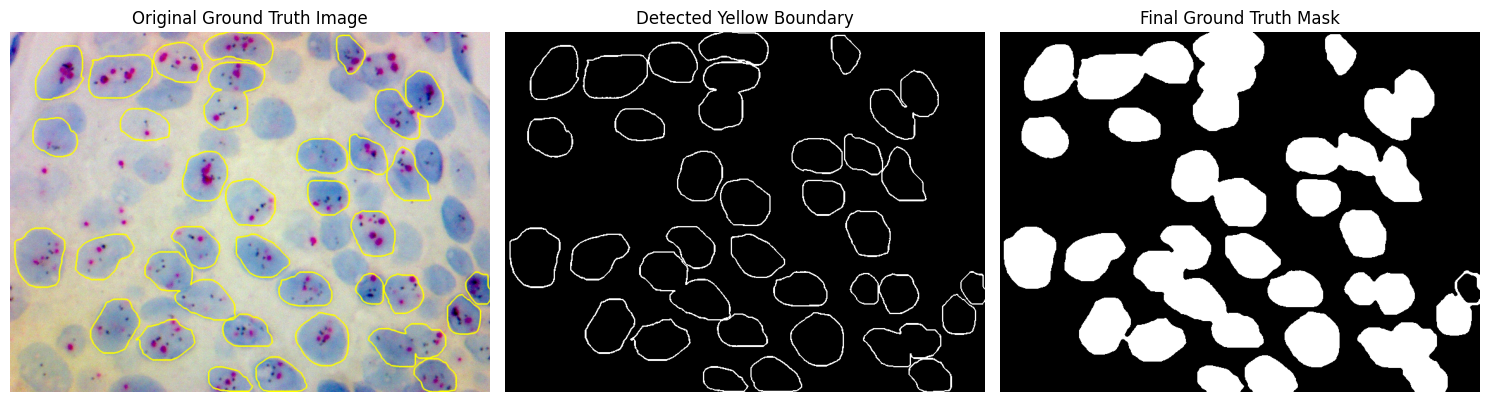

In [29]:
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.morphology import binary_closing, binary_dilation, disk
from scipy.ndimage import binary_fill_holes
import matplotlib.pyplot as plt

# 1. Load gambar ground truth
gt_img = imread('REF_DISH3.png')  # ganti nama file sesuai
# gt_img = imread('REF_DISH1.png')
# gt_img = imread('REF_DISH2.png')
# gt_img = imread('REF_DISH4.png')
# gt_img = imread('REF_DISH5.png')
# 2. Buat mask kuning: R dan G tinggi, B rendah
r = gt_img[:, :, 0]
g = gt_img[:, :, 1]
b = gt_img[:, :, 2]

# Kondisi kuning (threshold bisa disesuaikan)
yellow_mask = (r > 200) & (g > 200) & (b < 100)

# 3. (Opsional) Tebalkan garis kuning agar area bisa tertutup sempurna
yellow_mask_dilated = binary_dilation(yellow_mask, disk(1))

# 4. Tutup area tertutup untuk membentuk mask area
closed = binary_closing(yellow_mask_dilated, disk(3))  # sesuaikan jika perlu
gt_mask = binary_fill_holes(closed)

# 5. Tampilkan hasil
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.imshow(gt_img)
plt.title('Original Ground Truth Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(yellow_mask, cmap='gray')
plt.title('Detected Yellow Boundary')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gt_mask, cmap='gray')
plt.title('Final Ground Truth Mask')
plt.axis('off')

plt.tight_layout()
plt.show()


In [31]:
print("gt_mask shape     :", gt_mask.shape)
print("labels_ws shape   :", labels_ws.shape)

from skimage.transform import resize
# Resize gt_mask ke ukuran labels_ws
gt_mask_resized = resize(gt_mask, labels_ws.shape, order=0, preserve_range=True, anti_aliasing=False).astype(bool)


gt_mask shape     : (570, 759)
labels_ws shape   : (1200, 1600)


In [32]:
y_true = gt_mask_resized.flatten().astype(bool)
y_pred = (labels_ws > 0).flatten().astype(bool)

# IoU
from sklearn.metrics import jaccard_score
iou = jaccard_score(y_true, y_pred)

# Dice
intersection = np.logical_and(y_true, y_pred).sum()
dice = 2. * intersection / (y_true.sum() + y_pred.sum())

print(f"IoU : {iou:.4f}")
print(f"Dice: {dice:.4f}")


IoU : 0.5498
Dice: 0.7095


### **ANALISIS SEGMENTASI RASIO HER2 DAN CEN17 SIGNALS**

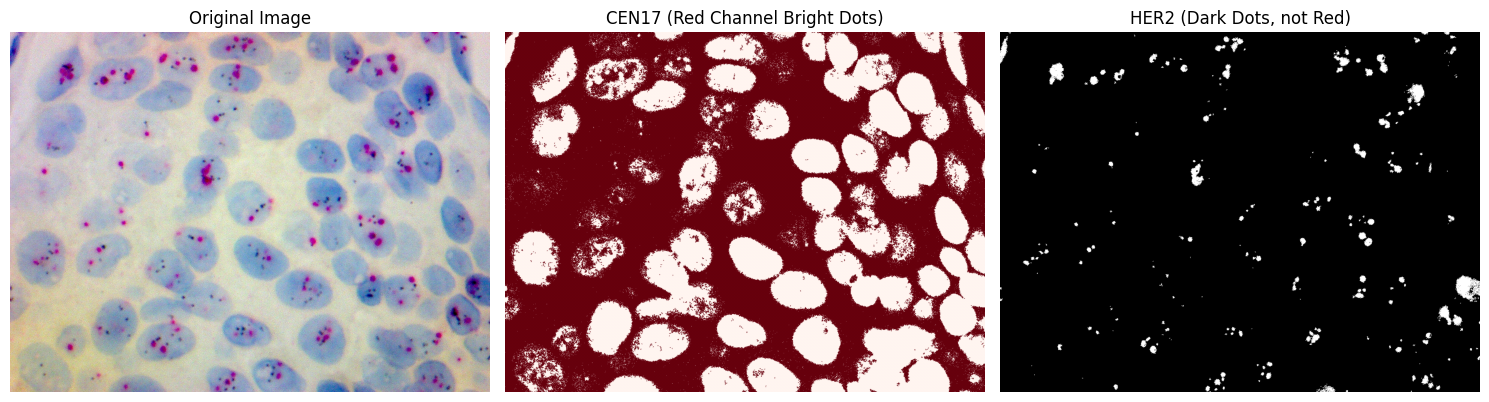

In [38]:
from skimage import io, color, filters, morphology
import numpy as np
import matplotlib.pyplot as plt

# Load gambar
img = im
img_float = img / 255.0

# Ambil channel R untuk CEN17
cen17_r = img_float[:, :, 0]

# Ambil grayscale untuk HER2
gray = color.rgb2gray(img_float)

# --- CEN17 DETECTION (Bright in Red Channel) ---
thresh_cen17 = filters.threshold_otsu(cen17_r)
mask_cen17 = cen17_r > thresh_cen17
mask_cen17 = morphology.remove_small_objects(mask_cen17, 5)

# --- HER2 DETECTION (Dark in grayscale, NOT RED AREAS) ---
# Mask area yang warnanya terlalu merah agar tidak disangka HER2
r = img_float[:, :, 0]
g = img_float[:, :, 1]
b = img_float[:, :, 2]
mask_red_area = (r > 0.6) & (g < 0.4) & (b < 0.4)

# Ambil area gelap yang bukan merah
mask_her2 = (gray < 0.4) & (~mask_red_area)
mask_her2 = morphology.remove_small_objects(mask_her2, 5)

# --- VISUALISASI ---
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask_cen17, cmap='Reds')
plt.title("CEN17 (Red Channel Bright Dots)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(mask_her2, cmap='gray')
plt.title("HER2 (Dark Dots, not Red)")
plt.axis('off')

plt.tight_layout()
plt.show()


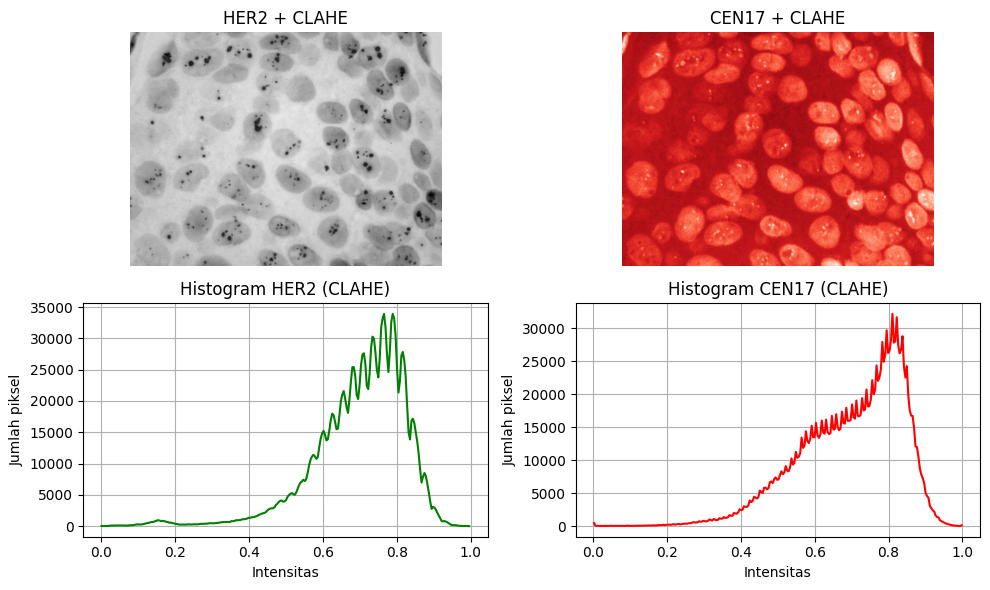

In [44]:
from skimage.exposure import equalize_adapthist, histogram
import matplotlib.pyplot as plt

# Hitung histogram
hist_her2, bins_her2 = histogram(gray)
hist_cen17, bins_cen17 = histogram(cen17_r)

# Visualisasi gambar + histogram
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Gambar hasil CLAHE
axs[0, 0].imshow(gray, cmap='gray')
axs[0, 0].set_title("HER2 + CLAHE")
axs[0, 0].axis('off')

axs[0, 1].imshow(cen17_r, cmap='Reds')
axs[0, 1].set_title("CEN17 + CLAHE")
axs[0, 1].axis('off')

# Histogram
axs[1, 0].plot(bins_her2, hist_her2, color='green')
axs[1, 0].set_title('Histogram HER2 (CLAHE)')
axs[1, 0].set_xlabel("Intensitas")
axs[1, 0].set_ylabel("Jumlah piksel")
axs[1, 0].grid(True)

axs[1, 1].plot(bins_cen17, hist_cen17, color='red')
axs[1, 1].set_title('Histogram CEN17 (CLAHE)')
axs[1, 1].set_xlabel("Intensitas")
axs[1, 1].set_ylabel("Jumlah piksel")
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


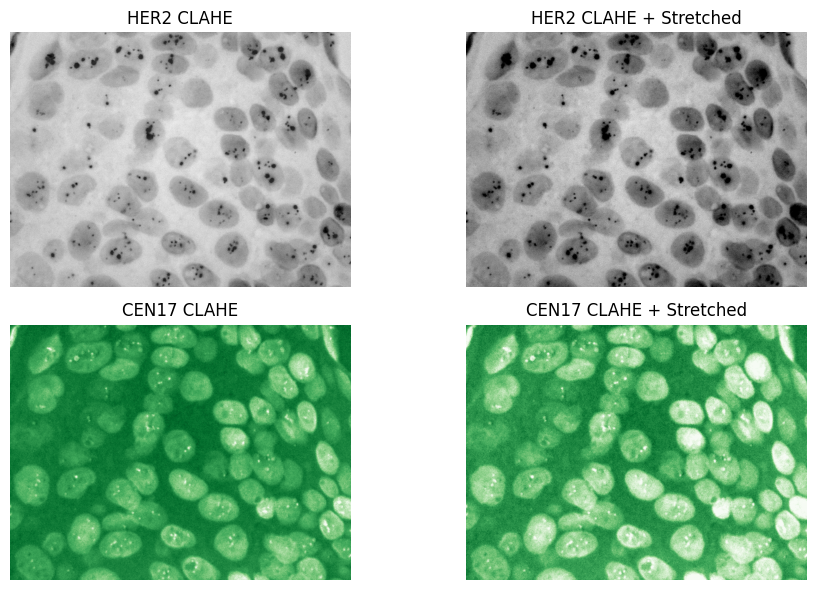

In [40]:
from skimage.exposure import rescale_intensity
from skimage.exposure import equalize_adapthist, histogram

# 1. CLAHE dulu
her2_clahe = equalize_adapthist(gray, clip_limit=0.001)
cen17_clahe = equalize_adapthist(cen17_r, clip_limit=0.003)

# 2. Rescale untuk menekan latar belakang → fokus ke titik terang
her2_stretched = rescale_intensity(gray, in_range=(0.33, 1.0))  # kamu bisa trial 0.2–0.4
cen17_stretched = rescale_intensity(cen17_r, in_range=(0.33, 1.0))

fig, axs = plt.subplots(2 , 2, figsize=(10, 6))

axs[0, 0].imshow(her2_clahe, cmap='gray')
axs[0, 0].set_title("HER2 CLAHE")
axs[0, 0].axis('off')

axs[0, 1].imshow(her2_stretched, cmap='gray')
axs[0, 1].set_title("HER2 CLAHE + Stretched")
axs[0, 1].axis('off')

axs[1, 0].imshow(cen17_clahe, cmap='Greens')
axs[1, 0].set_title("CEN17 CLAHE")
axs[1, 0].axis('off')

axs[1, 1].imshow(cen17_stretched, cmap='Greens')
axs[1, 1].set_title("CEN17 CLAHE + Stretched")
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()
